In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
print(train_images.shape)
print(len(train_images))
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train_labels)

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


**20% of training data for simple hold-out validation**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(y_train)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [2]
 [5]
 ...
 [8]
 [8]
 [8]]


**One-hot encoded labels**

In [0]:
from keras.utils import to_categorical

y_train_cate = to_categorical(y_train)
y_val_cate = to_categorical(y_val)
train_labels_cate = to_categorical(train_labels)
test_labels_cate = to_categorical(test_labels)

In [0]:
print(y_train_cate.shape)
print(y_val_cate.shape)
print(train_labels_cate.shape)
print(test_labels_cate.shape)
print(y_train[0])
print(y_train_cate[0])

(40000, 10)
(10000, 10)
(50000, 10)
(10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 3 conv layer CNN model with batch normalization and dropout

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

model = Sequential()
# conv layers
# 1
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization()) # before non-linearity
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
# 2
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
# 3
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

# dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# dropout
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy',  
    optimizer = 'adam',
    metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2

# Simple hold-out validation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256

# data augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(
    X_train,
    y_train_cate,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow(
    X_val,
    y_val_cate,
    batch_size=batch_size
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=X_train.shape[0] / batch_size,
    epochs=75,
    validation_data=validation_generator,
    validation_steps=X_val.shape[0] / batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
157/156 [==============================] - 54s 345ms/step - loss: 1.8639 - acc: 0.3199 - val_loss: 1.9240 - val_acc: 0.3242
Epoch 2/75
157/156 [==============================] - 52s 331ms/step - loss: 1.6428 - acc: 0.4042 - val_loss: 1.7191 - val_acc: 0.3817
Epoch 3/75
157/156 [==============================] - 52s 331ms/step - loss: 1.5186 - acc: 0.4516 - val_loss: 2.1498 - val_acc: 0.3250
Epoch 4/75
157/156 [==============================] - 53s 335ms/step - loss: 1.4466 - acc: 0.4777 - val_loss: 1.3546 - val_acc: 0.5162
Epoch 5/75
157/156 [==============================] - 52s 330ms/step - loss: 1.3950 - acc: 0.4964 - val_loss: 1.4824 - val_acc: 0.4906
Epoch 6/75
157/156 [==============================] - 52s 332ms/step - loss: 1.3599 - acc: 0.5114 - val_loss: 2.0588 - val_acc: 0.3750
Epoch 7/75
157/156 [==============================] - 52s 334ms/step - loss: 1.3219 - acc: 0.5290 - val_loss: 1.2856 - val_acc: 0.5457
Epoch 8

# Curves of loss and accuracy

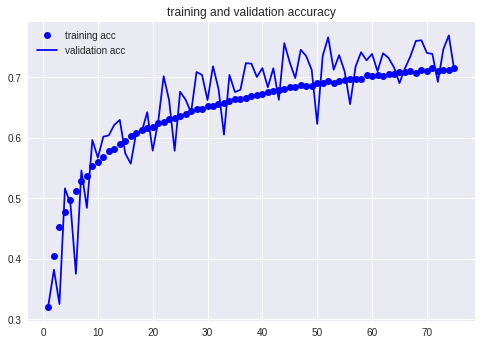

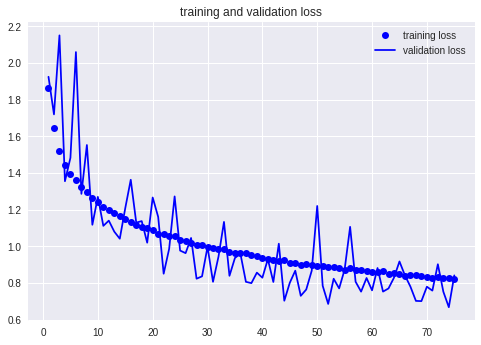

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()